In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/Turbine.csv')
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [3]:
df.columns
df.isnull().any()

Time stamp                       False
System power generated | (kW)    False
Wind speed | (m/s)               False
Wind direction | (deg)           False
Pressure | (atm)                 False
Air temperature | ('C)           False
dtype: bool

<AxesSubplot:>

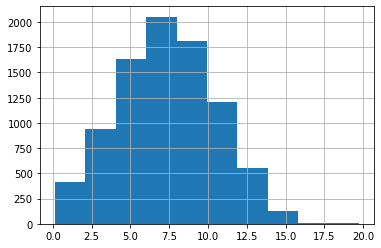

In [4]:
df['Wind speed | (m/s)'].hist()

<AxesSubplot:>

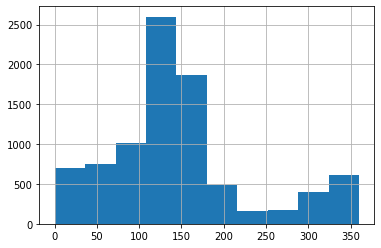

In [5]:
df['Wind direction | (deg)'].hist()

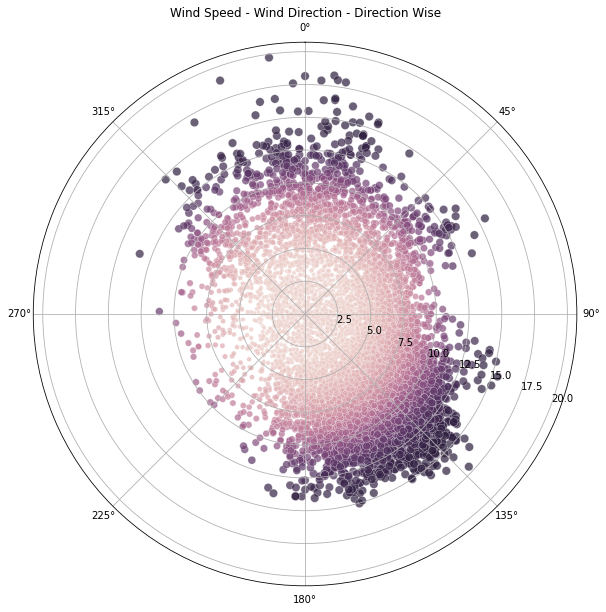

In [6]:
from math import radians

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

sns.scatterplot(x=[radians(x) for x in df['Wind direction | (deg)']], 
                y=df['Wind speed | (m/s)'],
                size=df['System power generated | (kW)'],
                hue=df['System power generated | (kW)'],
                alpha=0.7, legend=None)
# top represents the North 
ax.set_theta_zero_location('N')
# -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Direction Wise')
plt.ylabel(None);

<AxesSubplot:>

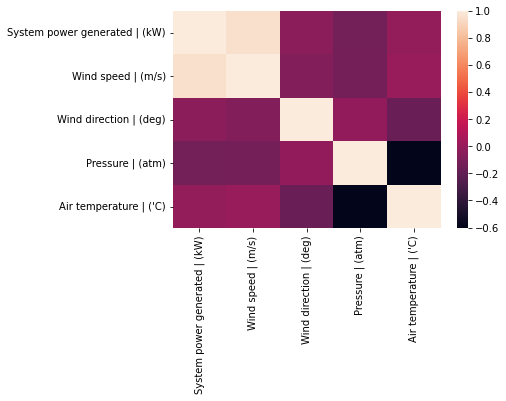

In [7]:
sns.heatmap(df.corr())

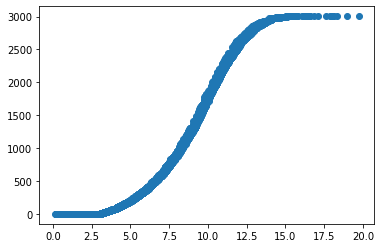

In [8]:
plt.scatter(df["Wind speed | (m/s)"],df["System power generated | (kW)"])

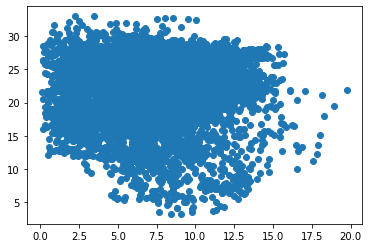

In [9]:
plt.scatter(df["Wind speed | (m/s)"],df["Air temperature | ('C)"])

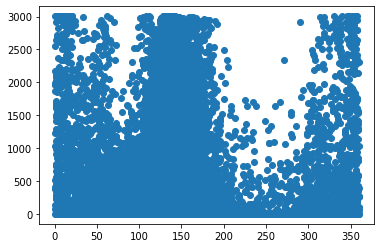

In [10]:
plt.scatter(df["Wind direction | (deg)"],df["System power generated | (kW)"]);

In [11]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [12]:
x = df.drop(columns=['Time stamp', 'System power generated | (kW)'])
y = df['System power generated | (kW)']
x.head()
x.values

array([[  9.926   , 128.      ,   1.00048 ,  18.263   ],
       [  9.273   , 135.      ,   0.99979 ,  18.363   ],
       [  8.66    , 142.      ,   0.999592,  18.663   ],
       ...,
       [  9.224   , 117.      ,   0.998408,  18.463   ],
       [  8.799   , 116.      ,   0.998013,  18.063   ],
       [  9.748   , 121.      ,   1.00038 ,  18.163   ]])

In [13]:
y.head()

0    1766.64
1    1433.83
2    1167.23
3    1524.59
4    1384.28
Name: System power generated | (kW), dtype: float64

In [14]:
y.values

array([1766.64, 1433.83, 1167.23, ..., 1405.71, 1221.36, 1676.77])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 4)
(2628, 4)
(6132,)
(2628,)


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(x_test)
y_pred

array([  78.79405159,  892.33052725,  320.37765171, ..., 1071.97232039,
        403.66681978, 2802.62567823])

In [18]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred, y_test)

In [19]:
print(accuracy*100)

90.50179511045324


In [20]:
#Saving the model
import pickle

In [21]:
pickle.dump(lr, open('model0.pkl','wb'))

In [22]:
#verify
model = pickle.load(open('model0.pkl', 'rb'))
print(model.predict([[9.926,128,1,18.263]]))

[1629.77085744]


/home/sakai/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
#1766.64 	9.926 	128 	1.000480 	18.263